In [1]:
import pandas as pd
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold

import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [3]:
d_code = pd.read_csv('속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('속성_L_코드.csv', index_col=0).T.to_dict()

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = add_code(df_train, d_code, h_code, l_code)
test = add_code(df_test, d_code, h_code, l_code)

In [5]:
print(df.shape)
print(test.shape)

(501951, 63)
(46404, 62)


# 데이터 전처리

Class Count 
 0    251106
1    250845
Name: target, dtype: int64 

Label1 50.03 % of the dataset
Lable2 49.97 % of the dataset


<AxesSubplot:title={'center':'Class Distributions \n (0: Unused || 1: Used)'}, xlabel='target', ylabel='count'>

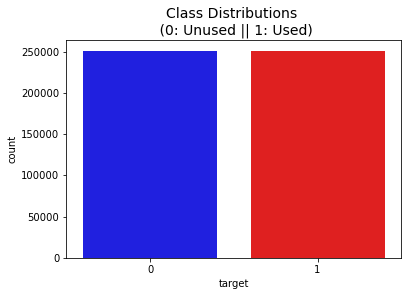

In [6]:
print('Class Count','\n',df['target'].value_counts(),'\n')
print('Label1', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Lable2', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
plt.title('Class Distributions \n (0: Unused || 1: Used)', fontsize=14)
colors = ["blue", "red"]
sns.countplot(df['target'],palette=colors)

In [7]:
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
df = df.drop(drop_columns,axis=1)

In [8]:
pd.set_option('display.max_columns', None)
df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,False,False,False,True,False,False,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,False,False,False,True,False,False,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,True,False,False,True,False,False,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,True,True,False,True,False,False,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,False,False,False,True,False,False,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [9]:
encoder = LabelEncoder()
list1 = ['d_l_match_yn','d_m_match_yn','d_s_match_yn','h_l_match_yn','h_m_match_yn','h_s_match_yn']
for i in list1:
    df[i] = encoder.fit_transform(df[i])

df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,0,0,0,1,0,0,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,0,0,0,1,0,0,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,1,0,0,1,0,0,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,1,1,0,1,0,0,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,0,0,0,1,0,0,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [10]:
df.shape

(501951, 57)

In [11]:
X = df.drop(['target'],axis=1,inplace=False)
y = df['target']

In [12]:
X.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [13]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [14]:
# train, test 분리
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# 검증세트 분할하기
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.2)
print(len(X_train), len(X_val))

321248 80312


# optuna 하이퍼 파라미터 튜닝

In [15]:
import optuna

In [16]:
df.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [17]:
feature_cols = [col for col in df.columns.tolist() if col not in ['id', 'target']]
target_col = ['target']

In [18]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, (trn, val) in enumerate(skf.split(df, df[target_col])):
    df.loc[val, 'kfold'] = i
df['kfold'] = df['kfold'].astype(int)

In [19]:
def fit_xgb(trial, xtr, ytr, xval, yval):
    params = {
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        "n_estimators": trial.suggest_int("n_estimators",200,2000,100),
        "subsample": trial.suggest_discrete_uniform("subsample",0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree",0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",5,20),
        "min_child_weight": trial.suggest_int("min_child_weight",5,20),
    }
    
    model = XGBClassifier(**params, tree_method='gpu_hist')
    model.fit(xtr, ytr.reshape(-1,), eval_metric='mlogloss')
    
    y_val_pred = model.predict_proba(xval)
    
    log = {
        "train logloss": log_loss(ytr, model.predict_proba(xtr)),
        "valid logloss": log_loss(yval, y_val_pred)
    }
    
    return model, log

In [20]:
def objective(trial):
    loss = 0
    for fold in range(5):
        trn_idx = df['kfold'] != fold
        val_idx = df['kfold'] == fold
        trn = df.loc[trn_idx, :]
        val = df.loc[val_idx, :]

        xtr, ytr = trn[feature_cols].values, trn[target_col].values
        xval, yval = val[feature_cols].values, val[target_col].values
        
        model, log = fit_xgb(trial, xtr, ytr, xval, yval)
        loss += log['valid logloss']/5
        
    return loss

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

In [22]:
study = optuna.create_study(direction="minimize", study_name='Xgboost optimization')
study.optimize(objective, n_trials=20)

[I 2022-01-20 00:34:00,508] A new study created in memory with name: Xgboost optimization
[I 2022-01-20 00:36:35,113] Trial 0 finished with value: 0.6411137311665505 and parameters: {'learning_rate': 0.01626783415407878, 'n_estimators': 1600, 'subsample': 0.8, 'colsample_bytree': 0.7, 'eta': 0.014985909179074424, 'reg_alpha': 37, 'reg_lambda': 22, 'max_depth': 8, 'min_child_weight': 19}. Best is trial 0 with value: 0.6411137311665505.
[I 2022-01-20 00:42:03,193] Trial 1 finished with value: 0.6393040694476371 and parameters: {'learning_rate': 0.04739443856127431, 'n_estimators': 1100, 'subsample': 0.6, 'colsample_bytree': 1.0, 'eta': 0.00763313465488776, 'reg_alpha': 47, 'reg_lambda': 92, 'max_depth': 20, 'min_child_weight': 18}. Best is trial 1 with value: 0.6393040694476371.
[I 2022-01-20 00:42:37,240] Trial 2 finished with value: 0.6586851857292069 and parameters: {'learning_rate': 0.0058985939704312715, 'n_estimators': 800, 'subsample': 0.7, 'colsample_bytree': 1.0, 'eta': 0.001469

In [23]:
history = study.trials_dataframe()
history.sort_values(by="value", ascending=True)

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_eta,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_reg_alpha,params_reg_lambda,params_subsample,state
19,19,0.633502,2022-01-20 02:59:14.094879,2022-01-20 03:17:30.574082,0 days 00:18:16.479203,0.6,0.001507,0.019803,15,7,1400,12,22,0.8,COMPLETE
8,8,0.635896,2022-01-20 01:16:49.819893,2022-01-20 01:22:20.896542,0 days 00:05:31.076649,0.9,0.003398,0.049503,17,17,500,21,36,0.9,COMPLETE
14,14,0.635985,2022-01-20 02:07:25.336238,2022-01-20 02:10:21.491653,0 days 00:02:56.155415,0.7,0.005210,0.031710,9,8,1100,14,23,0.8,COMPLETE
11,11,0.636781,2022-01-20 01:52:59.980961,2022-01-20 01:58:37.223743,0 days 00:05:37.242782,0.8,0.005283,0.023925,13,5,600,15,8,0.9,COMPLETE
10,10,0.636869,2022-01-20 01:47:09.713587,2022-01-20 01:52:59.979961,0 days 00:05:50.266374,0.8,0.006044,0.022900,13,6,700,18,12,0.9,COMPLETE
18,18,0.637083,2022-01-20 02:17:13.960455,2022-01-20 02:59:14.093878,0 days 00:42:00.133423,0.9,0.008733,0.033951,20,9,1500,7,59,0.8,COMPLETE
4,4,0.637257,2022-01-20 00:58:13.826061,2022-01-20 01:05:03.017325,0 days 00:06:49.191264,0.9,0.077273,0.027010,12,17,1800,49,30,1.0,COMPLETE
15,15,0.637558,2022-01-20 02:10:21.492653,2022-01-20 02:13:10.786685,0 days 00:02:49.294032,0.6,0.011563,0.032513,9,9,1200,25,30,0.7,COMPLETE
16,16,0.637633,2022-01-20 02:13:10.787686,2022-01-20 02:14:55.479936,0 days 00:01:44.692250,0.7,0.001949,0.034682,6,15,2000,13,40,0.8,COMPLETE
6,6,0.638984,2022-01-20 01:07:54.257031,2022-01-20 01:12:53.430876,0 days 00:04:59.173845,1.0,0.022464,0.045583,18,8,500,30,81,0.7,COMPLETE


In [24]:
study.best_params

{'learning_rate': 0.01980293560464339,
 'n_estimators': 1400,
 'subsample': 0.8,
 'colsample_bytree': 0.6,
 'eta': 0.0015070094258635845,
 'reg_alpha': 12,
 'reg_lambda': 22,
 'max_depth': 15,
 'min_child_weight': 7}

In [25]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    f1 = f1_score(y_test,pred)
    print('F1:',f1.round(3))

In [26]:
# optuna로 구한 최적 하이퍼 파라미터로 설정
xgb_clf = XGBClassifier(tree_method = "gpu_hist", learning_rate=0.01980293560464339, n_estimators=1400,
                        sub_sample=0.8, colsample_bytree=0.6, eta = 0.0015070094258635845, reg_alpha=12, reg_lambda=22, 
                        max_depth=15, min_child_weight=7, objective='binary:logistic')

# 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
            eval_metric="error", eval_set=[(X_val, y_val)])

pred = xgb_clf.predict(X_test)
get_clf_eval(y_test,pred)

[09:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-error:0.40816
[1]	validation_0-error:0.39978
[2]	validation_0-error:0.39815
[3]	validation_0-error:0.39653
[4]	validation_0-error:0.39640
[5]	validation_0-error:0.39497
[6]	validation_0-error:0.39440
[7]	validation_0-error:0.39425
[8]	validation_0-error:0.39284
[9]	validation_0-error:0.39175
[10]	validation_0-error:0.39188
[11]	validation_0-error:0.39183
[12]	validation_0-error:0.39159
[13]	validation_0-error:0.39176
[14]	validation_0-error:0.39124
[15]	validation_0-error:0.39122
[16]	validation_0-error:0.39080
[17]	validation_0-error:0.39098
[18]	validation

[239]	validation_0-error:0.37785
[240]	validation_0-error:0.37780
[241]	validation_0-error:0.37758
[242]	validation_0-error:0.37756
[243]	validation_0-error:0.37768
[244]	validation_0-error:0.37743
[245]	validation_0-error:0.37742
[246]	validation_0-error:0.37755
[247]	validation_0-error:0.37745
[248]	validation_0-error:0.37760
[249]	validation_0-error:0.37753
[250]	validation_0-error:0.37742
[251]	validation_0-error:0.37724
[252]	validation_0-error:0.37700
[253]	validation_0-error:0.37724
[254]	validation_0-error:0.37710
[255]	validation_0-error:0.37702
[256]	validation_0-error:0.37715
[257]	validation_0-error:0.37730
[258]	validation_0-error:0.37719
[259]	validation_0-error:0.37708
[260]	validation_0-error:0.37683
[261]	validation_0-error:0.37698
[262]	validation_0-error:0.37678
[263]	validation_0-error:0.37659
[264]	validation_0-error:0.37643
[265]	validation_0-error:0.37647
[266]	validation_0-error:0.37659
[267]	validation_0-error:0.37634
[268]	validation_0-error:0.37632
[269]	vali

[488]	validation_0-error:0.37283
[489]	validation_0-error:0.37286
[490]	validation_0-error:0.37290
[491]	validation_0-error:0.37278
[492]	validation_0-error:0.37297
[493]	validation_0-error:0.37291
[494]	validation_0-error:0.37296
[495]	validation_0-error:0.37280
[496]	validation_0-error:0.37266
[497]	validation_0-error:0.37262
[498]	validation_0-error:0.37262
[499]	validation_0-error:0.37267
[500]	validation_0-error:0.37263
[501]	validation_0-error:0.37261
[502]	validation_0-error:0.37262
[503]	validation_0-error:0.37251
[504]	validation_0-error:0.37224
[505]	validation_0-error:0.37231
[506]	validation_0-error:0.37244
[507]	validation_0-error:0.37234
[508]	validation_0-error:0.37254
[509]	validation_0-error:0.37246
[510]	validation_0-error:0.37240
[511]	validation_0-error:0.37244
[512]	validation_0-error:0.37236
[513]	validation_0-error:0.37246
[514]	validation_0-error:0.37249
[515]	validation_0-error:0.37239
[516]	validation_0-error:0.37237
[517]	validation_0-error:0.37256
[518]	vali

[737]	validation_0-error:0.37075
[738]	validation_0-error:0.37072
[739]	validation_0-error:0.37078
[740]	validation_0-error:0.37057
[741]	validation_0-error:0.37063
[742]	validation_0-error:0.37070
[743]	validation_0-error:0.37073
[744]	validation_0-error:0.37077
[745]	validation_0-error:0.37073
[746]	validation_0-error:0.37070
[747]	validation_0-error:0.37072
[748]	validation_0-error:0.37074
[749]	validation_0-error:0.37079
[750]	validation_0-error:0.37074
[751]	validation_0-error:0.37074
[752]	validation_0-error:0.37077
[753]	validation_0-error:0.37057
[754]	validation_0-error:0.37068
[755]	validation_0-error:0.37043
[756]	validation_0-error:0.37056
[757]	validation_0-error:0.37047
[758]	validation_0-error:0.37039
[759]	validation_0-error:0.37058
[760]	validation_0-error:0.37049
[761]	validation_0-error:0.37037
[762]	validation_0-error:0.37039
[763]	validation_0-error:0.37022
[764]	validation_0-error:0.37034
[765]	validation_0-error:0.37031
[766]	validation_0-error:0.37039
[767]	vali

[986]	validation_0-error:0.37011
[987]	validation_0-error:0.37004
[988]	validation_0-error:0.36992
[989]	validation_0-error:0.36992
[990]	validation_0-error:0.36995
[991]	validation_0-error:0.36998
[992]	validation_0-error:0.36998
[993]	validation_0-error:0.36996
[994]	validation_0-error:0.36992
[995]	validation_0-error:0.36989
[996]	validation_0-error:0.36986
[997]	validation_0-error:0.37002
[998]	validation_0-error:0.37000
[999]	validation_0-error:0.37004
[1000]	validation_0-error:0.36997
[1001]	validation_0-error:0.37002
[1002]	validation_0-error:0.37007
[1003]	validation_0-error:0.37004
[1004]	validation_0-error:0.36991
[1005]	validation_0-error:0.36989
[1006]	validation_0-error:0.37006
[1007]	validation_0-error:0.37009
[1008]	validation_0-error:0.37000
[1009]	validation_0-error:0.36987
[1010]	validation_0-error:0.36984
[1011]	validation_0-error:0.36982
[1012]	validation_0-error:0.36972
[1013]	validation_0-error:0.36983
[1014]	validation_0-error:0.36995
[1015]	validation_0-error:0.

[1228]	validation_0-error:0.36961
[1229]	validation_0-error:0.36957
[1230]	validation_0-error:0.36960
[1231]	validation_0-error:0.36971
[1232]	validation_0-error:0.36987
[1233]	validation_0-error:0.36978
[1234]	validation_0-error:0.36988
[1235]	validation_0-error:0.36982
[1236]	validation_0-error:0.36971
[1237]	validation_0-error:0.36966
[1238]	validation_0-error:0.36966
[1239]	validation_0-error:0.36972
[1240]	validation_0-error:0.36978
[1241]	validation_0-error:0.36978
[1242]	validation_0-error:0.36968
[1243]	validation_0-error:0.36972
[1244]	validation_0-error:0.36956
[1245]	validation_0-error:0.36958
[1246]	validation_0-error:0.36965
[1247]	validation_0-error:0.36978
[1248]	validation_0-error:0.36971
[1249]	validation_0-error:0.36968
[1250]	validation_0-error:0.36968
[1251]	validation_0-error:0.36981
[1252]	validation_0-error:0.36981
[1253]	validation_0-error:0.36978
[1254]	validation_0-error:0.36978
[1255]	validation_0-error:0.36986
[1256]	validation_0-error:0.36979
[1257]	validat

In [27]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        print('\n')

In [28]:
pred_proba = xgb_clf.predict_proba(X_test)[:,1]
thresholds = [0.3,0.35,0.38,0.4,0.45,0.5,0.55,0.6]
get_eval_by_threshold(y_test,pred_proba.reshape(-1,1),thresholds)

임계값 0.3
F1: 0.691


임계값 0.35
F1: 0.693


임계값 0.38
F1: 0.692


임계값 0.4
F1: 0.69


임계값 0.45
F1: 0.677


임계값 0.5
F1: 0.647


임계값 0.55
F1: 0.595


임계값 0.6
F1: 0.506




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

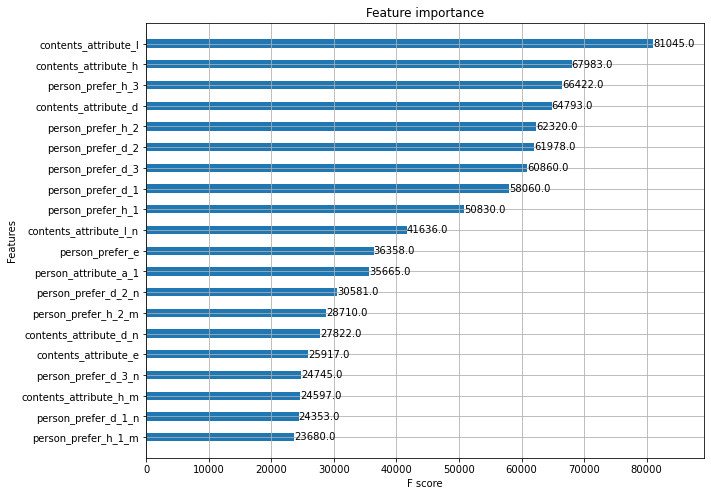

In [29]:
from xgboost import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

# 테스트 데이터 전처리

In [30]:
# 학습에 불필요한 열인 id, person_rn(사용자번호), contents_rn(컨텐츠번호), contents_open_df(컨텐츠 열람 일시) 제거
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
test = test.drop(drop_columns,axis=1)
test

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,2,4,95,3,3,5,1,1,2,759,147,1,5,91,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,759,759,759,2006
46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,86,31,278,3,3,10,2,1,2,759,147,1,4,91,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,759,759,759,2006
46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,288,279,278,3,3,10,2,1,2,759,147,1,4,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006
46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,288,279,278,3,1,5,1,3,2,759,147,1,5,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006


In [31]:
for i in list1:
    test[i] = encoder.fit_transform(test[i])

test.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,0,0,1,1,1,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,0,0,0,1,0,0,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,1,0,0,1,1,1,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,1,0,0,1,1,1,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,1,0,0,1,0,0,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
5,0,0,0,0,0,0,1,2,3,1,181,175,114,4,171,190,93,3,1,5,1,3,2,1463,1095,1,4,93,175,152,56,1,175,152,56,1,114,109,56,1,1095,1094,1093,926,169,452,188,464,92,397,92,397,1462,1459,1458,2013
6,0,0,0,1,0,0,2,0,4,5,800,182,819,4,79,93,93,2,3,5,1,1,2,953,1097,1,4,83,800,783,745,744,182,152,56,1,819,815,745,744,1097,1094,1093,926,78,385,92,397,92,397,78,389,952,951,930,2009
7,1,0,0,1,0,0,2,0,4,5,461,101,180,4,38,36,45,1,1,3,1,3,2,1851,453,4,3,44,461,451,450,377,101,91,56,1,175,152,56,1,452,451,450,377,30,349,30,347,30,356,30,355,1846,1843,1832,2020
8,1,0,0,1,0,0,2,0,4,5,436,464,396,3,31,278,86,3,3,9,2,3,2,1851,453,1,2,44,436,431,378,377,464,463,450,377,396,396,378,377,452,451,450,377,30,342,277,542,85,391,30,355,1846,1843,1832,2020
9,0,0,0,0,0,0,1,7,2,5,923,896,851,6,59,95,4,1,3,10,2,1,2,530,1228,5,4,117,923,923,864,864,895,884,864,864,847,847,824,744,1227,1227,1227,926,58,368,94,398,3,316,94,407,529,528,527,2006


# 최종 예측

In [32]:
final_pred = xgb_clf.predict_proba(test)[:,1]
final_pred

array([0.66133446, 0.40703702, 0.44439048, ..., 0.6543127 , 0.6476804 ,
       0.60932416], dtype=float32)

In [33]:
threshold=0.35
final_pred = np.where(final_pred >= threshold , 1, 0)
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission['target'] = final_pred
sample_submission

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [35]:
sample_submission['target'].value_counts()

1    37626
0     8778
Name: target, dtype: int64

In [36]:
sample_submission.to_csv('sample_submission(xgboost).csv', index=False, encoding='utf-8-sig')